In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas as pd

#import dataset langsung dari kaggle
od.download(
    "https://www.kaggle.com/datasets/shree1992/housedata?resource=download")

Skipping, found downloaded files in "./housedata" (use force=True to force download)


In [ ]:
import pandas as pd

dataset = pd.read_csv("./housedata/data.csv")
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
#mengecek jika ada nilai null
print(dataset.isnull().sum())

In [ ]:
#Melakukan pemodelan Logistic Regression menggunakan perbandingan 80:20 untuk training vs testing
#Regression hanya menerima numerik, jadi harus mengecek apakah ada kolom selain numerik
dataset.info()

In [ ]:
'''from sklearn import preprocessing
#karena dalam Linear Regression supaya performa lebih bagus makan range 0 -> 1
data_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
dataset[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
         'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement']] = data_scaler.fit(dataset[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
         'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement']])'''

In [ ]:
#Men-drop kolom tidak bernumerik
X = dataset.drop(['date','street', 'city', 'statezip', 'country',
          'yr_built', 'yr_renovated', 'street','city', 'statezip', 'country'], axis = 1)
#memasukan label ke y
y = dataset['price']

In [ ]:
#melakukan splitting data, ukuran training data dan test data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3680, 11)
(3680,)
(920, 11)
(920,)


In [ ]:
#melakukan modelling data
#memanggil model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
#melakukan fitting ke train model
linreg = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


In [ ]:
#menghitung metrix buat cek keakuratan dengan mse, rmse, mae
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Menghitung MSE, RMSE, MAE
#semakin kecil semakin baik
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


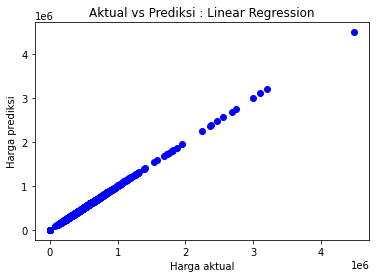

In [ ]:
#melakukan plotting buat cek  prediksi dengan faktual dengan diagram
plt.scatter(y_pred, y_test, c = 'blue')
plt.xlabel('Harga aktual')
plt.ylabel('Harga prediksi')
plt.title('Aktual vs Prediksi : Linear Regression')
plt.show()


In [ ]:
linreg.score(X_test, y_test)

1.0